# MEDPC Data Tutorial

**About:** The purpose of this tutorial is to tidy and plot data. 

**Contact:**
* Dexter Kim: dexterkim2000@gmail.com
* Brett Hathaway: bretthathaway@psych.ubc.ca

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, rgt_functions.py file, and this notebook must all be in the same folder
    * See Section 4 if you want to have your data stored in a different folder

**Note: This tutorial is split into multiple sections**
* Section 1: Loading Data into Python 
* Section 2: Baseline & Acquisition Analysis and Plotting*
* Section 3: Latin Square Analysis and Plotting*
* Section 4: Miscellaneous (optional)

*Depending on your data, you should only have to complete one of section 2 and 3

**Please run the following cell!**

In [69]:
#MEDPC rat gambling task functions imports, will print "I am being executed!" if functional
import rgt_functions as rgt

#main imports 
import os
import pandas as pd
import numpy as np

# plotting imports 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# stats imports 
import scipy.stats as stats

#the following line prevents pandas from giving unecessary errors 
pd.options.mode.chained_assignment = None

***
# 1) Load data into Python
* Assign the names of the files that you want to load in to `file_names`
* `load_data()` creates a table similar to the excel sheet(s) you loaded in. (in the order established in `file_names`) 
    * note: `df` means dataframe, and will store the data you load in as a table
* passing `reset_sessions = True`
    * makes the session numbers start from 1 again (you may want to do this for baseline analysis or if you're loading in multiple projects)
* `load_multiple_data(file_names)` 
    * loads in multiple cohorts (with the same subject numbers) and assigns them unique subject numbers (ex. subject 1 of cohort 1 --> subject 101) 

In [95]:
file_names = ['BH07_raw_free_S29-30.xlsx'] 

df = rgt.load_data(file_names)

#load_data won't print the dataframe. Use the following function to view the top of your dataframe. 
#Note: it should look the exact same as your first excel file. 

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis Section (Analysis by Session)

Set your objects! These will be used in the rest of section 2A and 2B. Examples are left in for clarity.
* Assign the rat subject numbers for each group to `exp_group` and `control_group`
    * you can add additional groups - just ensure you also add them to the group_list and group_names
* Assign the names of your groups to `group_names`
    * as a dictionary
* Put your groups together into a list
    * **must** be in the same order as they are in group_names 
* For plotting:
    * Assign the title of the project to `title`
    * Assign the range of sessions you want to include in figures to `startsess` and `endsess`


In [96]:
control_group = [3, 4, 5, 6, 9, 13, 14, 15, 17, 18, 23, 24, 27, 28, 30, 31] #In this example: Tg negative rats

exp_group = [1, 2, 7, 8, 11, 12, 16, 19, 20, 21, 22, 25, 26, 29, 32] #In this example: Tg positive rats

group_names = {0: 'Tg negative',
              1: 'Tg positive'} 

group_list = [control_group, exp_group]

#for plotting: 
title = 'Nigrostriatal activation during acquisition' 

startsess = 29 #first session you would like to include in figures
endsess = 30 #last session you would like to include in figures

**Check your session data**
* `check_sessions` gives us a summary for each rat including session numbers, session dates and # of trials for each session.
* This allows us to see if there are any missing/incorrect session numbers, and if MED-PC exported all of the desired data into the Excel file you loaded in (`file_names`).  

In [4]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-09  28          53.0
         2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  

**To drop/edit data from certain session(s)**
* In `rgt.drop_sessions`, pass the df you loaded in and the session number(s) you'd like to remove (as a list)
    * For example, to remove all data from session 28 and 29, I would write: `rgt.drop_sessions(df, [28, 29])`
    * Requirement: session number must exist in the session column of df
    
* In `rgt.edit_sessions`, write the original session numbers you want to remove, and the numbers you want to replace them with, in the correct order 
    * For example, to change **all** 30s to 29s, and 31s to 30s, I would write: `rgt.edit_sessions(df2, [30, 31], [29, 30], subs = "all")`
    * If you want to make edits, **for certain subjects**, I would assign the subject numbers to  `subs`. For example, I would write `subs = [17, 21]`


In [97]:
# rgt.drop_sessions(df, session_num) 
#needs to be assigned to new object
df2 = rgt.drop_sessions(df, [28])

In [ ]:
# df2 = rgt.edit_sessions(df2, [30, 31], [29, 30], subs = "all")

**Check that you dropped/edited the desired session(s)**

In [6]:
rgt.check_sessions(df2) 

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  29          80.1
         2020-10-10  

**The following cell will calculate the means for all variables for each rat.**

In df_sum, the rows represent subjects (rats 1 to n)

The columns are explained below:
* `##P#` represents the percent choice of each option. For example, `29P1` represents the percentage of times P1 was selected during the 29th session. 
* `risk##` represents the risk score for each session: (P1 + P2) - (P3 + P4) 
* `collect_lat##` represents the mean collect latency for each session
* `choice_lat##` represents the mean choice latency for each session 
* `omit##` represents the number of omissions for each session
* `trial##` represents the number of trials completed for each session
* `prem##` represents the percentage of premature responses for each session

In [98]:
df_sum = rgt.get_summary_data(df2) #change to df instead of df2 if you didn't do any session editing
df_sum #prints the dataset 

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30
1,90.8397,0,8.39695,0.763359,83.0645,0,16.9355,0,81.6794,66.129,0.929160,1.058226,0.638321,0.655323,0,0,131.1,124.0,26.404494,24.848485
2,9.33333,65.3333,10.6667,14.6667,4.93827,76.5432,0,18.5185,49.3333,62.963,1.157333,1.010617,1.057733,1.249012,1,0,76.1,81.0,30.275229,33.606557
3,2.17391,8.69565,56.5217,32.6087,0,11.6279,67.4419,20.9302,-78.2609,-76.7442,0.467174,0.549070,2.833261,3.652791,3,2,49.0,45.0,3.921569,6.250000
4,5.88235,73.5294,4.90196,15.6863,13.4021,64.9485,3.09278,18.5567,58.8235,56.701,0.904412,0.817938,1.000980,0.885258,1,0,103.0,97.0,13.445378,24.218750
5,0,1.53846,98.4615,0,9.375,7.8125,79.6875,3.125,-96.9231,-65.625,0.397385,0.618125,3.135846,3.176250,3,5,68.1,69.0,8.108108,16.867470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,10.3896,64.9351,2.5974,22.0779,7.77778,60,2.22222,30,50.6494,35.5556,0.987532,0.719889,2.941169,1.291444,4,1,81.0,91.1,4.705882,10.784314
29,26.5823,10.1266,53.1646,10.1266,14.2857,18.5714,45.7143,21.4286,-26.5823,-34.2857,0.867089,0.753429,1.474557,1.846429,0,2,79.0,72.0,15.957447,15.294118
30,0,100,0,0,0.775194,93.7984,5.42636,0,100,89.1473,0.752419,0.789845,1.087177,0.593953,1,0,125.0,129.0,16.666667,15.131579
31,7.27273,83.6364,3.63636,5.45455,2.24719,87.6404,7.86517,2.24719,81.8182,79.7753,1.087636,1.203933,2.057091,2.679663,0,1,55.0,90.0,12.698413,10.891089


**Get the risk status of the rats using the following code**

The following code will add two columns to your df: `mean_risk` and `risk_status`

* Note: 
    * `risk_status == 1` indicates a positive risk score (optimal) 
    * `risk_status == 2` indicates a negative risk score (risky)
    * `mean_risk` is the mean risk score averaged across the sessions between `startsess` and `endsess` for a given subject
        * You can change `startsess` and `endsess` by passing the session numbers instead. For example, `rgt.get_risk_status(df_sum, 28, 30)`
        * Requirement: `startsess` and `endsess` must be in the df
    * `print(risky, optimal)` prints out 2 lists of rat subjects: the risky rats, and the optimal rats 

In [99]:
df_summary, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_summary[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1   73.904211          1.0
2   56.148148          1.0
3  -77.502528          2.0
4   57.762280          1.0
5  -81.274038          2.0
..        ...          ...
28  43.102453          1.0
29 -30.433996          2.0
30  94.573643          1.0
31  80.796731          1.0
32   1.587302          1.0

[31 rows x 2 columns]
[3, 5, 7, 9, 13, 15, 16, 25, 29] [1, 2, 4, 6, 8, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32]


**Export your data to an Excel file!** 
* Assign a name to the column in the exported Excel file that will specify the control vs. experimental group. In this example: `tg_status`
    * numbers will be assigned according to their order in group_list (in this example: Tg negative rats == 0, Tg positive rat == 1)
* Assign the name of the **new** Excel file that you're exporting: `new_file_name`

In [ ]:
rgt.export_to_excel(df_summary, groups = group_list, column_name = 'tg_status', new_file_name = 'BH07_free_S29-30.xlsx')

**Calculate means and SEMs for your experimental groups**
* In mean_scores: each value is the mean for that column (ex. `29P1`) for each experimental group (in this example: `tg negative` and `tg positive`) 
* In SEM: each value is the SEM for that column for each experimental group
* If you want to view certain columns, specify them as a list in square brackets following mean_scores or SEM
    * For example, `mean_scores[['risk29', 'risk30']]` will display a table with only those 2 columns


These can also be exported to an excel file, using `mean_scores.to_excel('file name.xlsx')` or `SEM.to_excel('file name.xlsx')`
* check out this link for more details: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html


In [103]:
mean_scores, SEM = rgt.get_means_sem(df_summary, group_list, group_names)
mean_scores #all mean scores
# mean_scores[['risk29', 'risk30']] #view certain columns


,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
Tg negative,5.74901,50.9906,33.8409,9.41941,7.24256,53.3089,28.8852,10.5634,13.4793,21.1029,...,2.10245,2.07925,3.25,3.5,77.4563,83.0812,14.055,13.637,17.2911,1.3125
Tg positive,16.0466,45.0598,21.712,17.1815,14.8991,45.8362,22.0626,17.2021,22.2129,21.4706,...,1.77515,1.82612,1.53333,2.73333,86.56,85.0267,18.3601,20.5969,21.8417,1.26667


**Calculate means and SEMS for your experimental groups, split by risk status or sex**

* Can use a technique called list comprehension to create lists of experimental risky rats, experimental optimal rats, etc.
    * example given below
    
    
* Alternatively, you can just manually type in the lists: 
    * e.g., `control_risky` = [1,2,3]
    
    
* You can adapt this code to split by sex, or further split risk groups by sex:
    * First, create a list of female and male subjects: `female = [1,2,3]`; `male = [4,5,6]`
    * `control_female = [subject for subject in control_group if subject in female]`
    * `control_risky_female = [subject for subject in control_risky if subject in female]`


* You can create as many groups as you like, just make sure you add them to `group_list_risk` and `group_names_risk`!

In [112]:

control_risky = [subject for subject in control_group if subject in risky]
control_optimal = [subject for subject in control_group if subject in optimal]
exp_risky = [subject for subject in exp_group if subject in risky]
exp_optimal = [subject for subject in exp_group if subject in optimal]


group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group lists!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_summary, group_list_risk, group_names_risk)

mean_scores_risk

    

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
Control risky,3.06118,12.4092,75.0945,9.43513,4.68872,16.8433,69.0698,9.39816,-69.0592,-56.9359,...,2.5709,2.75038,3,3.4,60.02,59.02,11.9097,13.8373,-62.9976,2
Experimental risky,10.9236,10.4871,57.0766,21.5128,6.82045,13.6201,56.6761,22.8834,-57.1786,-59.1188,...,1.59679,1.80653,0,2.25,66.75,63.05,17.0782,22.7373,-58.1487,2
Control optimal,6.97075,68.5277,15.0893,9.41227,8.40341,69.8842,10.6194,11.093,50.9968,56.5752,...,1.88951,1.77419,3.36364,3.54545,85.3818,94.0182,15.0301,13.546,53.786,1
Experimental optimal,17.9095,57.6318,8.85216,15.6065,17.8368,57.5511,9.47589,15.1362,51.0826,50.7758,...,1.84001,1.83325,2.09091,2.90909,93.7636,93.0182,18.8262,19.8185,50.9292,1


# 2B) Baseline & Acquisition Analysis (Plotting Section)

**Bar plot of P1-P4 choices**
* The following function plots the mean P1-P4 choices for the experimental groups 
    * You can change startsess and endsess to calculate the mean over whichever sessions you like

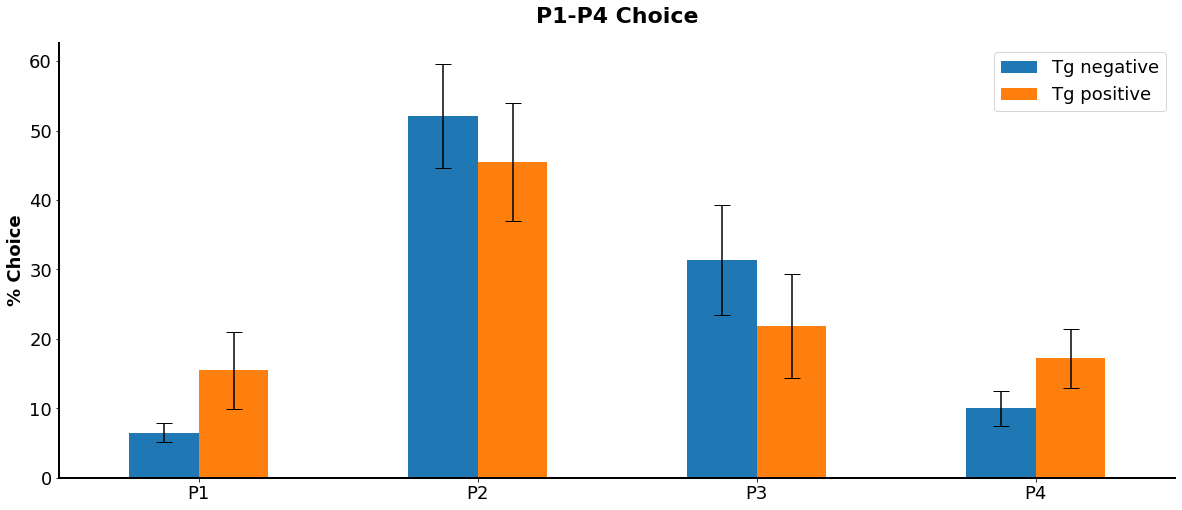

In [105]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

**Line plot of other variables**

`rgt.rgt_plot('variable', startsess, endsess, group_names, title, mean_scores, SEM, var_title = 'variable name')`
* `variable` specifies the variable you want to plot. 
    * For example, if I want to plot `choice_lat`, I would replace `variable` with `'choice_lat'` (just the variable name, don't include session numbers)
* `startsess` and `endsess` can also be replaced with the range of session numbers you'd like to plot 
    * For example, if I want to plot `choice_lat` over sessions 29 to 31, I would replace `startsess` and `endsess` with `29` and `31` respectively
    * Requirement: `startsess` and `endsess` must be in the df
* `var_title` specifies the Y axis label

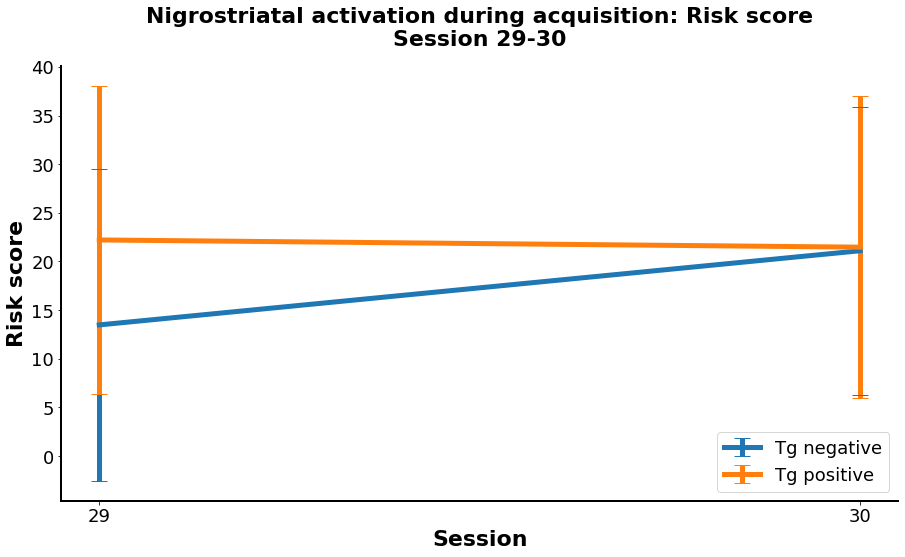

In [106]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, var_title = 'Risk score') 

**Plot means of variables as a bar plot** 

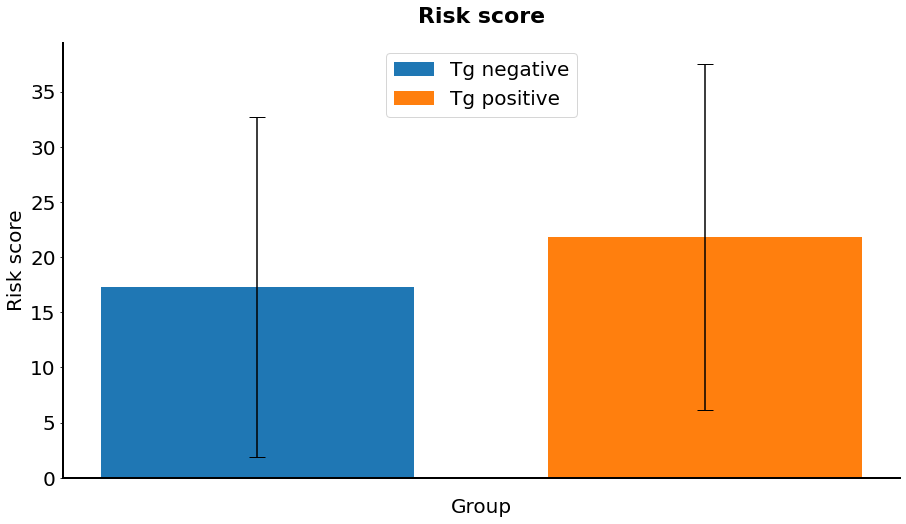

In [118]:
rgt.rgt_bar_plot('risk', startsess, endsess, group_names, title, mean_scores, SEM, var_title = 'Risk score')

**Plotting by risk status**

* same as above, except pass `group_names_risk`, `mean_scores_risk` and `SEM_risk` instead

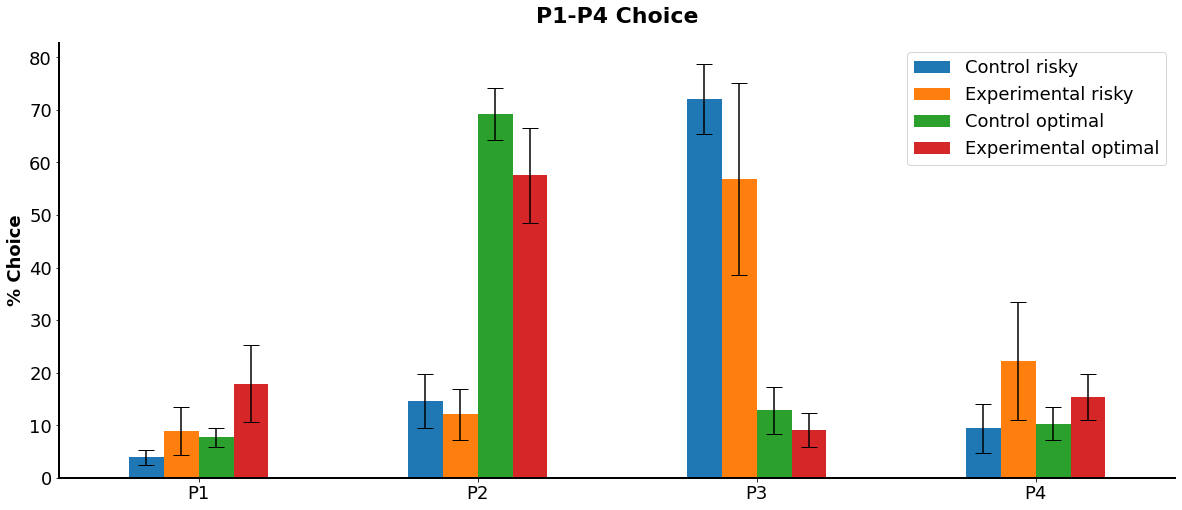

In [113]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk, SEM_risk)

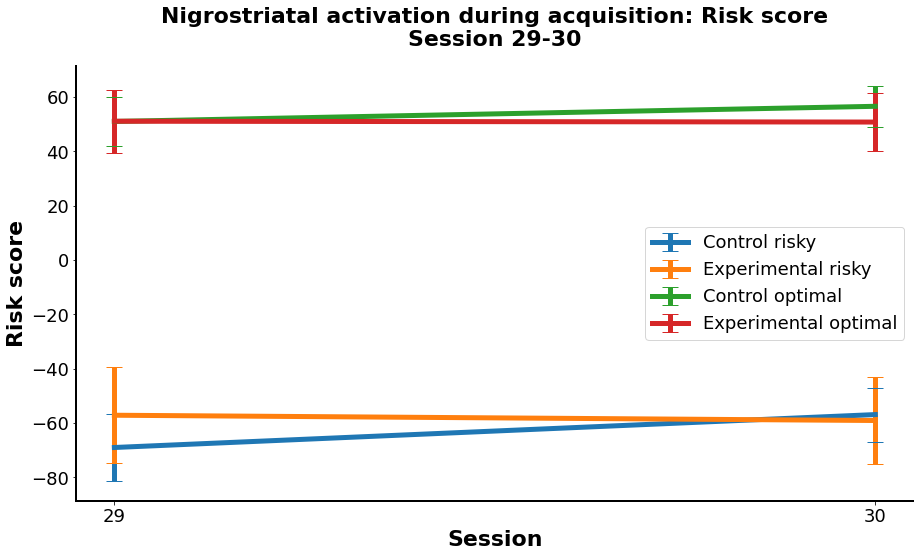

In [114]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk, var_title = 'Risk score') 

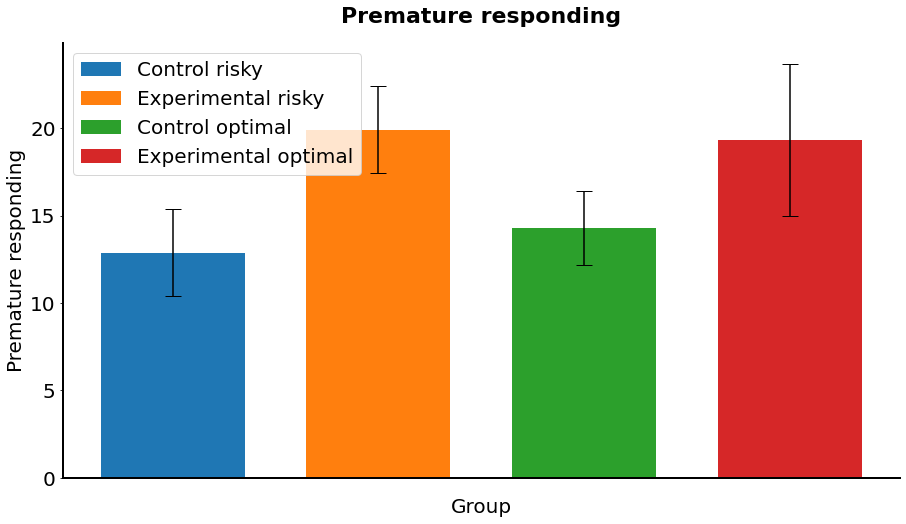

In [119]:
rgt.rgt_bar_plot('prem', startsess, endsess, group_names_risk, title, mean_scores_risk, SEM_risk, var_title = 'Premature responding')

***
# 3A) Latin Square Analysis (Analysis by Group) 

**This section assumes you have assigned dosing information to the 'Group' variable in MEDPC**
* in this example: vehicle = 1 in Group column, low dose = 2, mid dose = 3, high dose = 4

Set your objects! These will be used in the rest of section 3A and 3B. Examples are left in for clarity.
* Assign the names of the files that you want to analyze to `file_names`
* Assign a title, for plotting
* Assign the startdose and enddose variables - 1 and 4 in this example 

**Note:** This section assumes all of your rats received the same manipulation; if you have multiple drugs/brain regions in your dataset, you can see an example of how to split your analysis in Section 2, using list comprehension

In [70]:
file_names = ['BH06_raw_round1-infusions.xlsx', 'BH06_raw_round1-makeup.xlsx'] 

subjects = df.Subject.unique() # all subjects

df = rgt.load_data(file_names)

#for plotting: 
title = '5-HT2c Antagonist' 

#lowest group number
startdose =  1
#highest group number
enddose = 4


**Check your data to make sure you have all Group numbers for each rat**
* This function will show you the Group numbers and trials completed for each rat

In [30]:
rgt.check_groups(df)

Subject  Group
1        1         50.1
         2         79.1
         3         40.0
         4        111.0
2        1         77.0
         2         74.0
         3         70.0
         4         94.0
3        1         50.1
         2         38.1
         3         45.0
         4         40.0
4        1         86.0
         2         82.0
         3         95.0
         4         79.0
5        0         87.0
         1         79.1
         2         79.0
         4        128.0
6        1        125.1
         2         98.0
         3        105.0
         4        121.0
7        1         76.1
         2         80.1
         3         68.0
         4         57.1
8        1         75.0
         2         58.0
         3         57.1
         4         66.0
9        1         65.1
         2         69.0
         3         55.0
         4         48.0
11       1         56.1
         2         58.0
         3         61.0
         4         55.0
12       1         63.0
 

**Drop subjects & edit Group numbers**
* For editing Group numbers: if I want to change `group = 0` to `group = 1` for all subjects, I would write `rgt.edit_groups(df, orig_group = [0], new_group = [1], subs = "all")`
    * If I want to do the same thing but only for subject 2 and 3, change `subs = "all"` to `subs = [2,3]`
* For dropping subjects: if I want to remove the data for subjects 5, 9 and 12, I would write `rgt.drop_subjects(df, subs = [5, 9, 12])`

In [71]:
df2 = rgt.edit_groups(df, orig_group = [0], new_group = [3], subs = [5])

# df2 = rgt.drop_subjects(df, subs = [5, 9, 12])


**Check that you edited the Group number as desired**

In [34]:
rgt.check_groups(df2)

Subject  Group
1        1         50.1
         2         79.1
         3         40.0
         4        111.0
2        1         77.0
         2         74.0
         3         70.0
         4         94.0
3        1         50.1
         2         38.1
         3         45.0
         4         40.0
4        1         86.0
         2         82.0
         3         95.0
         4         79.0
5        1         79.1
         2         79.0
         3         87.0
         4        128.0
6        1        125.1
         2         98.0
         3        105.0
         4        121.0
7        1         76.1
         2         80.1
         3         68.0
         4         57.1
8        1         75.0
         2         58.0
         3         57.1
         4         66.0
9        1         65.1
         2         69.0
         3         55.0
         4         48.0
11       1         56.1
         2         58.0
         3         61.0
         4         55.0
12       1         63.0
 

**Calculate means for each rat at each dose**

The rows represent subjects (rats 1 to n)

The columns are explained below:
* `##P#` represents the percent choice of each option. For example `1P1` represents the percent choice of P1 at dose 1
* `risk##` represents the risk score for each dose: (P1 + P2) - (P3 + P4) 
* `collect_lat##` represents the mean collect latency for each dose
* `choice_lat##` represents the mean choice latency for each dose
* `omit##` represents the number of omissions for each dose
* `trial##` represents the number of trials completed for each dose
* `prem##` represents the number of premature responses for each dose

In [72]:
df_sum = rgt.get_summary_data(df, mode = 'Group')
df_sum

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit3,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4
1,0,34,64,2,0,57.1429,35.0649,7.79221,5,40,...,0,2,50.1,79.1,40.0,111.0,54.954955,32.478632,70.588235,14.615385
2,3.8961,59.7403,7.79221,28.5714,12.3288,61.6438,6.84932,19.1781,8.57143,45.7143,...,0,1,77.0,74.0,70.0,94.0,23.000000,28.846154,31.372549,17.543860
3,0,18,78,4,0,13.8889,80.5556,5.55556,2.22222,20,...,0,0,50.1,38.1,45.0,40.0,57.264957,70.400000,64.000000,56.989247
4,1.23457,67.9012,0,30.8642,1.21951,65.8537,0,32.9268,0,77.6596,...,1,2,86.0,82.0,95.0,79.0,24.561404,21.904762,16.666667,15.957447
5,5.12821,35.8974,55.1282,3.84615,3.84615,61.5385,28.2051,6.41026,17.4419,40.6977,...,1,0,79.1,79.0,87.0,128.0,33.898305,41.044776,21.621622,19.496855
6,1.62602,85.3659,0,13.0081,2.06186,72.1649,0,25.7732,1.90476,69.5238,...,0,0,125.1,98.0,105.0,121.0,13.888889,15.517241,10.256410,1.626016
7,5.33333,62.6667,16,16,21.25,58.75,2.5,17.5,7.35294,58.8235,...,0,0,76.1,80.1,68.0,57.1,42.307692,40.740741,50.000000,52.892562
8,4,44,0,52,6.89655,31.0345,5.17241,56.8966,0,42.8571,...,0,0,75.0,58.0,57.1,66.0,18.478261,42.574257,47.169811,41.071429
9,0,1.5625,98.4375,0,0,14.9254,82.0896,2.98507,1.85185,11.1111,...,1,2,65.1,69.0,55.0,48.0,26.436782,24.175824,46.078431,54.716981
11,3.63636,1.81818,94.5455,0,1.72414,3.44828,93.1034,1.72414,1.63934,4.91803,...,0,0,56.1,58.0,61.0,55.0,35.294118,31.764706,11.594203,29.487179


**Impute missing data**
* see 'Misc' Section for a description of this function


In [73]:
df_sum = rgt.impute_missing_data(df_sum, session = 2, subject = 12, choice = 'all', vars = 'all')

**Get risk status based on Vehicle dose data**

The following code will add a column to your df: `risk_status`, calculated from the Vehicle dose data

* Note: 
    * `risk_status == 1` indicates a positive risk score (optimal) 
    * `risk_status == 2` indicates a negative risk score (risky)
    * `print(risky, optimal)` prints out 2 lists of rat subjects: the risky rats, and the optimal rats 


In [74]:
df_sum,risky,optimal = rgt.get_risk_status_vehicle(df_sum)
print(risky, optimal)

[1, 3, 5, 8, 9, 11, 13, 15] [2, 4, 6, 7, 12, 14, 16]


**Export your data to an Excel file!** 
* Assign the name of the column that will specify the control vs. experimental group. Ex) `brain_region`
* Assign the name of the **new** Excel file `new_file_name` 

In [ ]:
rgt.export_to_excel(df_sum, new_file_name = 'BH06_all-data.xlsx')

**Calculate means and SEMs for each dose**
* If you only want to view certain columns, specify them as a list in square brackets following `means` 
    * For example, `means[['omit3', 'omit4']]` will display a table with only those 2 columns 

In [75]:
means, SEM = rgt.get_means_sem(df_sum) 
means
# means[['omit3', 'omit4']]

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4,risk_status
All rats,2.82995,43.6167,40.3008,13.2526,5.77629,45.1162,33.728,15.3794,4.78807,45.0382,...,1.06667,73.5133,72.8667,73.1467,79.0267,28.6214,31.7981,33.0648,27.4993,1.53333


**Calculating means and SEMS separately for risky and optimal rats**

* you can pass risky and optimal groups, along with the group names, to the `get_means_sem` function to calculate mean/SEM values separately

In [79]:

groups_risk = [risky,optimal]
group_names_risk = {0: 'risky',
                    1: 'optimal'}

means_risk, SEM_risk = rgt.get_means_sem(df_sum, groups = groups_risk, group_names = group_names_risk)

means_risk


,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4,risk_status
risky,1.83142,23.1729,66.0857,8.91001,2.63594,30.1166,55.3807,11.8668,4.84414,26.9877,...,1.625,60.6875,62.9125,60.275,69.3875,34.7641,37.4495,38.4616,33.111,2
optimal,3.97113,66.981,10.8323,18.2156,9.36526,62.2586,8.9822,19.3939,4.72399,65.6673,...,0.428571,88.1714,84.2429,87.8571,90.0429,21.6012,25.3393,26.8969,21.0859,1


# 3B) Latin Square Plotting Section

**Create figures based on mean values for all rats**

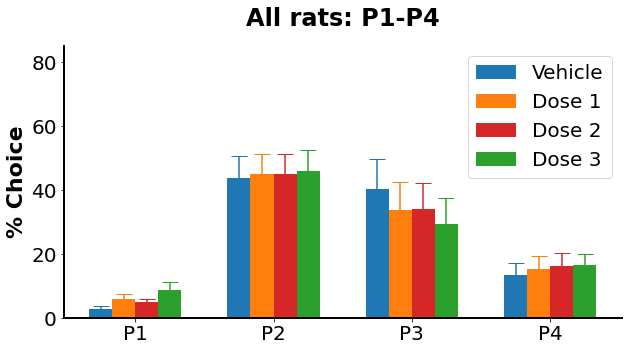

In [59]:
rgt.ls_bar_plot('All rats',means,SEM)

**Figures for other variables**

`rgt.rgt_plot('variable',startdose,enddose,title,means,SEM,var_title = 'variable')`

* `variable` specifies the variable you want to plot. 
    * For example, if I want to plot `choice_lat`, I would replace `variable` with `'choice_lat'`
* `var_title` specifies the Y axis label


I am being executed!
I am being executed!


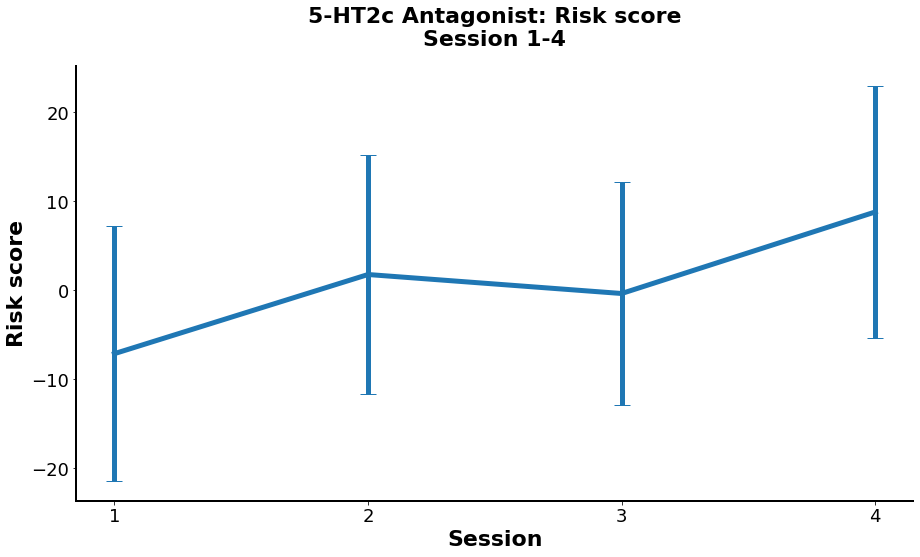

In [66]:
rgt.rgt_plot('risk',startdose,enddose,title,means,SEM,var_title = 'Risk score')

**Plotting risky and rats separately**

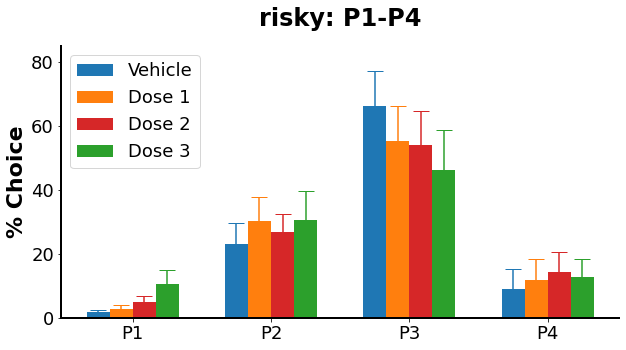

In [80]:
rgt.ls_bar_plot('risky',means_risk,SEM_risk)

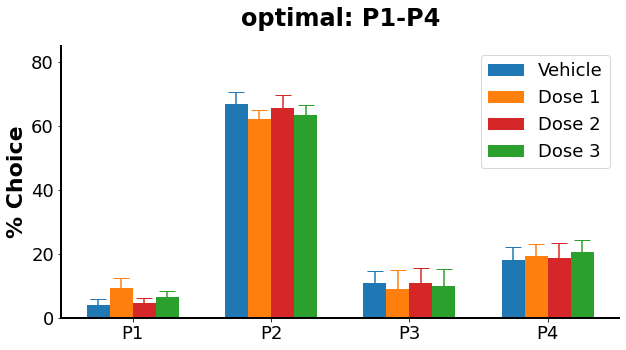

In [81]:
rgt.ls_bar_plot('optimal',means_risk,SEM_risk)

**To produce a line plot with risky and optimal rats:**
* pass an additional argument to `rgt.rgt_plot`: group_names = group_names_risk


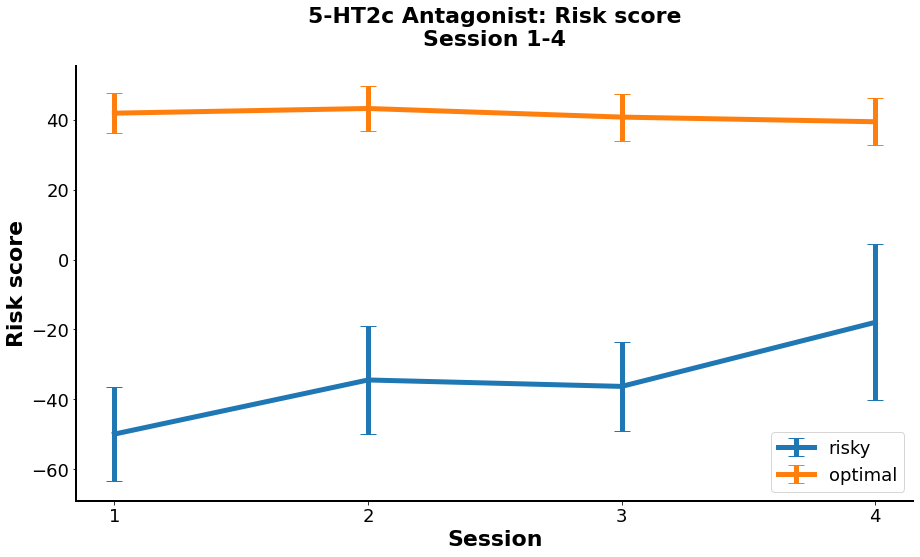

In [85]:

rgt.rgt_plot('risk',startdose,enddose,title,means_risk,SEM_risk,group_names = group_names_risk, var_title = 'Risk score')


***
# 4) Miscellaneous Section

**Changing your working directory**

* Check your current working directory by running `os.getcwd()` 
    * by default, this will be wherever the jupyter notebook file is saved
* After loading in rgt_functions.py, you may want to move to the folder where your data is saved
* Change your working directory using `os.chdir('C:\\...)`
    * can be absolute or relative file path
* For example, my current working directory is `'C:\\Users\\dexte\\hathaway_1'`, I can change this by running `os.chdir('C:\\Users\\dexte\\hathaway_1\\data')` 
    * slashes will be different if you are not using Windows

In [ ]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir('C:\\Users\\dexte\\hathaway_1\\data') 

**Impute missing data by taking the mean**

`rgt.impute_missing_data(df, session = None, subject = None, choice = 'all', vars = 'all')`

* this function takes the mean of the session before and after the missing data, for the specified session and subject
    * You can also specify a Group number in the session variable for Latin Square analysis
* For example, if you have missing data for subject 12, dose 2, this function will calculate the mean of dose 1 and 3
    * Code: `rgt.impute_missing_data(df, session = 2, subject = 12, choice = 'all', vars = 'all')`
* You can specify which P1-P4 options you'd like to impute by passing a list to `choice`
    * `choice = [1,3]`
* You can specify which variables by passing the variable names as a list to `vars`
    * `vars = ['prem', 'choice_lat']`

**Making changes to the rgt_functions.py file**

* If you make changes in the .py file, run the following cell
* Every time you change & save the .py file, the changes will automatically be loaded into this notebook!

In [45]:
%load_ext autoreload
%autoreload 2